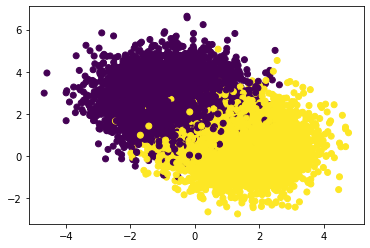

In [89]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=10000, centers=2, center_box=(-3.0, 3.0), random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [97]:
class CustomLogistic:
    
    def __init__(self, lr=.1, max_iters=100):
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, X, y):
        
        self.coef_ = np.random.randn(X.shape[1], 1)
        self.intercept_ = 0
        ya = y.reshape((-1, 1))
        
        for i in range(self.max_iters):
            delm, delc = self.gradient_accend(X, ya)
            self.coef_ -= delm
            self.intercept_ -= delc
            
    def gradient_accend(self, X, ya):
        
        g = np.dot(X, self.coef_) + self.intercept_
        yh = 1 / ( 1 + np.exp(-g))
        
        delm = ((yh - ya) * X).mean(axis=0, keepdims=True).T * self.lr
        delc = ((yh - ya)).mean(axis=0) * self.lr
        return delm, delc
    
    def predict(self, X):
        g = np.dot(X, self.coef_) + self.intercept_
        yh = 1 / ( 1 + np.exp(-g))
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return (yp == y).mean()
        
        

In [98]:
model = CustomLogistic()

In [99]:
model.fit(X_train, y_train)

In [100]:
model.predict(X_test[:10])

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [101]:
y[:10]

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [102]:
model.score(X_test, y_test)

0.9212121212121213